In [16]:
import pandas as pd
import numpy as np

In [17]:
news = pd.read_csv("https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv", index_col = 0)
news.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


In [18]:
news.groupby('type').size().sort_values(ascending = False)

type
fake          155
conspiracy     31
political      23
unreliable      6
unknown         6
junksci         6
bias            6
reliable        3
hate            1
clickbait       1
dtype: int64

In [19]:
# some news may same
news.drop_duplicates('content', 'first', inplace = True)
news.groupby('type').size().sort_values(ascending = False)

type
fake          146
conspiracy     31
political      22
unreliable      6
unknown         6
bias            6
junksci         5
reliable        3
hate            1
clickbait       1
dtype: int64

In [20]:
df = pd.DataFrame(news, columns = ['id', 'type', 'content', 'title', 'domain'])
df.head()

,id,type,content,title,domain
0,141,unreliable,Sometimes the power of Christmas will make you...,Church Congregation Brings Gift to Waitresses ...,awm.com
1,256,fake,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,beforeitsnews.com
2,700,unreliable,Never Hike Alone: A Friday the 13th Fan Film U...,Never Hike Alone - A Friday the 13th Fan Film ...,cnnnext.com
3,768,unreliable,"When a rare shark was caught, scientists were ...",Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,awm.com
4,791,clickbait,Donald Trump has the unnerving ability to abil...,Trump’s Genius Poll Is Complete & The Results ...,bipartisanreport.com


In [21]:
df.isnull().sum()

id          0
type       12
content     0
title       0
domain      0
dtype: int64

In [22]:
df = df.dropna()

Text(0.5, 1.0, 'Number of articles by type')

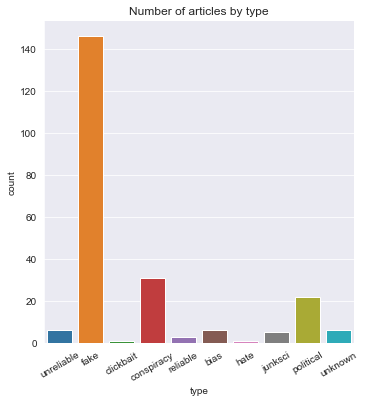

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
type_plot = sns.catplot('type', data = df, kind = 'count')
(type_plot.set_xticklabels(rotation=30)
          .ax.set_title('Number of articles by type'))

In [24]:
# Some types of samples are insufficient, merge labels
# df['type'].replace(
    # ['conspiracy', 'junksci', 'rumor', 'hate', 'unreliable', 'fake'], 'fake', inplace = True)
df['type'].replace(
    ['reliable', 'political'], 'truth', inplace = True)
df['type'].replace(
    ['conspiracy', 'junksci', 'rumor', 'hate', 'unreliable', 'clickbait', 'unknown', 'satire', 'bias'], 'others', inplace = True)

Text(0.5, 1.0, 'Number of articles by merged type')

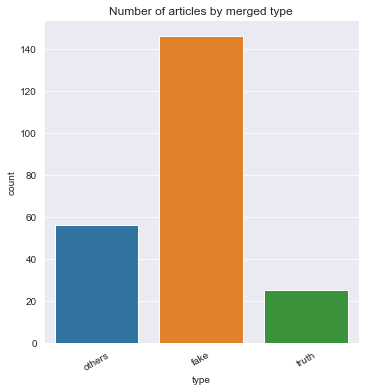

In [25]:
type_plot2 = sns.catplot('type', data = df, kind = 'count')
(type_plot2.set_xticklabels(rotation=30)
          .ax.set_title('Number of articles by merged type'))

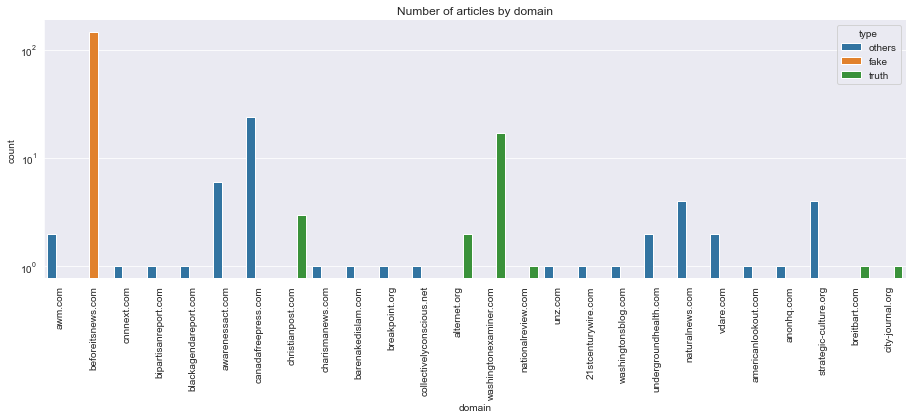

In [26]:
domain_plot = sns.catplot(x="domain", hue="type", data=df, kind="count", legend_out=False)
(domain_plot.set_xticklabels(rotation = 90)
            .set(yscale = "log")
            .set(title = 'Number of articles by domain')
            .fig.set_size_inches(15,4))

In [27]:
import re
from nltk.tokenize import RegexpTokenizer

In [28]:
def clean(text):
    #Remove URLs
    text = re.sub(r'(http|https?:\/\/)?((?:(\w+-)*\w+)\.)+(?:[a-z]{2})(\/?\w?-?=?_?\??&?)+[\.]?([a-z0-9\?=&_\-%#])?', '', text)
    #lower texts
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokenizer = RegexpTokenizer('\w+[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    #only keep vocabulary
    voc = [i for i in tokens if i.isalpha()]
    #only keep dig
    value = re.compile(r'^[-+]?(\b[0-9]+(\.[0-9]+)?|\.[0-9]+)([eE][-+]?[0-9]+\b)?$')
    dig = [i for i in tokens if value.search(i)]
    return voc, dig

In [29]:
df['content'], df['dig_in_content'] = zip(*df.apply(lambda x: clean(x['content']), axis=1))
df['dig_in_content'] = df.apply(lambda x: np.asarray(x['dig_in_content'], dtype = float), axis=1)
df['title'], _= zip(*df.apply(lambda x: clean(x['title']), axis=1))
df['len_content'] = df.apply(lambda x: len(x['content']), axis=1)

<AxesSubplot:xlabel='type', ylabel='len_content'>

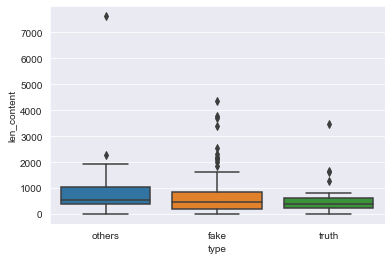

In [30]:
sns.boxplot(x=df['type'], y=df['len_content'])

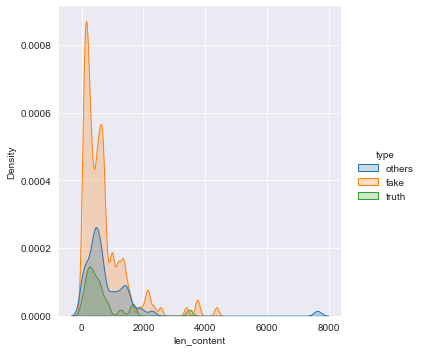

In [31]:
sns.displot(df, x="len_content", hue = 'type', kind="kde", bw_adjust=.25, fill=True)

In [33]:
df2 = df.explode('dig_in_content').reset_index(drop=True)
df2 = df2.dropna()
df2['dig_in_content'] = df2['dig_in_content'].astype(float)

In [34]:
df2.groupby('type')['dig_in_content'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
fake,1483.0,1.359918e+10,5.231931e+11,0.0,19.0,214.0,2014.0,2.014804e+13
others,563.0,1.388855e+05,2.485823e+06,0.0,16.0,86.0,2008.0,5.600000e+07
truth,166.0,1.815729e+04,7.831498e+04,1.0,20.0,108.0,2007.5,7.000000e+05


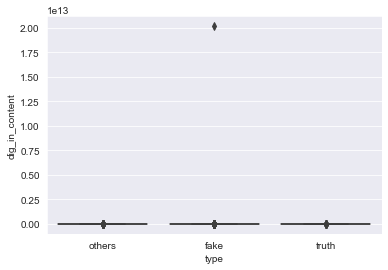

In [35]:
box = sns.boxplot(x=df2['type'], y=df2['dig_in_content'])

In [36]:
from matplotlib.cbook import boxplot_stats  
boxplot_stats(df2['dig_in_content']).pop(0)['fliers']

array([3.00400000e+05, 8.92500000e+03, 1.35715000e+05, 1.22230000e+04,
       1.35715000e+05, 1.35900000e+05, 1.34877000e+05, 1.34115000e+05,
       1.35846000e+05, 1.34300000e+05, 1.35050000e+05, 1.34980000e+05,
       1.35370000e+05, 1.35525000e+05, 6.92000000e+04, 2.15240000e+04,
       3.63000000e+06, 1.09470000e+04, 1.10470000e+04, 1.11080000e+04,
       1.12120000e+04, 2.00061000e+05, 1.99985000e+05, 3.77970000e+04,
       3.77970000e+04, 1.88980000e+04, 1.11160000e+04, 1.88980000e+04,
       5.00000000e+04, 9.12600000e+03, 1.22230000e+04, 1.10230000e+04,
       5.83590000e+05, 2.13490000e+04, 9.12600000e+03, 1.22230000e+04,
       3.12018000e+05, 1.17590000e+04, 1.64474000e+05, 1.64740000e+04,
       5.12410000e+04, 9.67400000e+03, 9.67400000e+05, 4.74220000e+06,
       1.22230000e+04, 1.22230000e+04, 2.13490000e+04, 1.22230000e+04,
       9.12600000e+03, 7.00300000e+03, 8.49320000e+04, 3.13048000e+05,
       2.00061000e+05, 1.99985000e+05, 2.12017000e+05, 2.34787000e+05,
      

In [43]:
#remove outlierss and big numbers
df3 = df2.drop(df2[df2['dig_in_content']>1e+10].index)

In [44]:
df3.groupby('type')['dig_in_content'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
fake,1481.0,451345.344362,7.962266e+06,0.0,19.0,205.0,2014.0,295368000.0
others,563.0,138885.532860,2.485823e+06,0.0,16.0,86.0,2008.0,56000000.0
truth,166.0,18157.289157,7.831498e+04,1.0,20.0,108.0,2007.5,700000.0


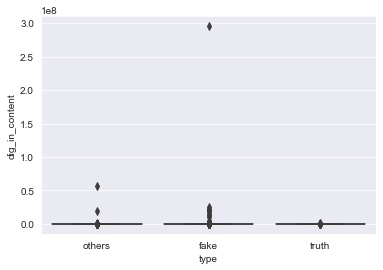

In [45]:
box2 = sns.boxplot(x=df3['type'], y=df3['dig_in_content'])

In [47]:
df3 = df2.drop(df2[df2['dig_in_content']>1e+06].index)

In [50]:
df3.groupby('type')['dig_in_content'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
fake,1458.0,9848.129630,56200.278088,0.0,18.0,173.5,2013.0,967400.0
others,561.0,6382.691622,46525.418977,0.0,16.0,86.0,2008.0,750000.0
truth,166.0,18157.289157,78314.975488,1.0,20.0,108.0,2007.5,700000.0


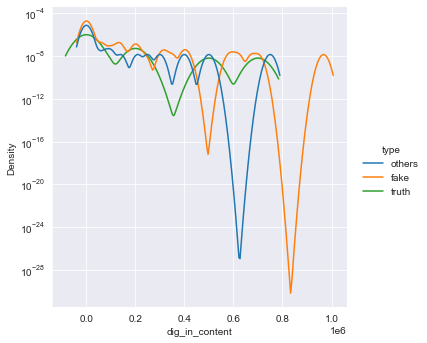

In [49]:
dist2 = sns.displot(df3, x="dig_in_content", hue = 'type', kind="kde")
dist2.set(yscale = "log")
#dist2.set(xscale = "log")

In [23]:
from nltk.stem import WordNetLemmatizer 

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

In [27]:
#from nltk.stem import WordNetLemmatizer 
#wnl = WordNetLemmatizer() 
df4 = df.explode('content').reset_index(drop=True)
#df4['content'] = df4.apply(lambda x: wnl.lemmatize(x['content']), axis=1)

In [28]:
df5 = df4.drop(columns=['id', 'title', 'domain', 'dig_in_content', 'len_content'])
def my_merge(df):
    return','.join(df.values)
df5 = df5.groupby(['type'])['content'].apply(my_merge)
df5 = df5.reset_index()

In [32]:
df5

,type,content
0,fake,"awakening,of,strands,of,dna,reconnecting,with,..."
1,others,"sometimes,the,power,of,christmas,will,make,you..."
2,truth,"i,wish,i,had,done,so,when,our,nowadult,daughte..."


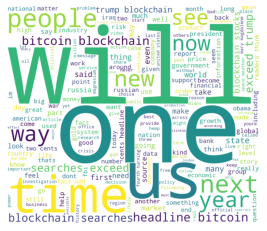

In [30]:
from wordcloud import WordCloud
# fake
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(df5['content'][0])
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

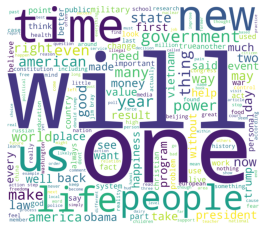

In [33]:
# others
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(df5['content'][1])
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

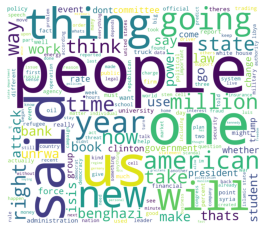

In [34]:
# truth
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(df5['content'][2])
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:
# remove stopwords
from nltk.corpus import stopwords 
stop = set(stopwords.words('english'))
filter_fake = [w for w in df5['content'][0].split(',') if w not in stopwords.words('english')]
filter_others = [w for w in df5['content'][1].split(',') if w not in stopwords.words('english')]
filter_truth = [w for w in df5['content'][2].split(',') if w not in stopwords.words('english')]

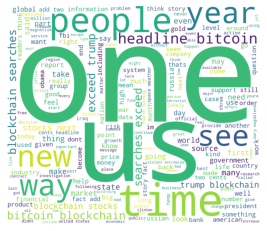

In [36]:
# fake
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(','.join(filter_fake))
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

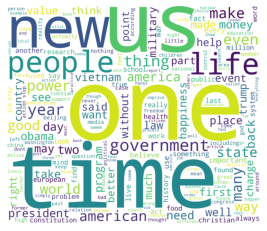

In [37]:
# others
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(','.join(filter_others))
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

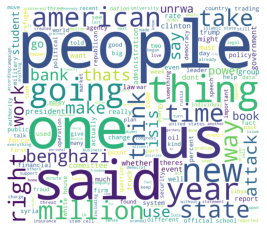

In [38]:
# trurh
wordcloud = WordCloud(background_color="white",width=2000, height=1720, margin=2).generate(','.join(filter_truth))
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()